# About
Compare the embedding of input text with the centroid of the embeddings of mtraining data category clusters.

Initial phase:
1. Get embeddings of training data of all categories.
2. Calculate the centroid of embeddings of each categories. Since each data belonging to a category would be closes to each other, naturally forming a cluster.
  
Inference phase:
1. Get the embedding of the input text.
2. Calculate similarity with the centroids of each category clusters.
3. Based upon similarity score predict the category of input text.


# Initial phase
Get embeddings of training data and find centroid of category clusters.

In [1]:
training_data = {
    "affirm": [
        "agreement confirmation positive Yes, I agree That’s correct or Sure I’ll do it.",
        "Yes, that makes perfect sense.",
        "I completely agree with you.",
        "Absolutely, that’s correct.",
        "Sure thing, I’ll handle it.",
        "Of course, that's a great idea.",
        "Definitely, I'm on board.",
        "Yes, I think that's the way to go.",
        "I’m with you on that.",
        "Totally agree with this.",
        "Sure, that works perfectly.",
        "Yes, that’s exactly what I was thinking.",
        "Agreed, let’s proceed with this plan.",
        "Without a doubt, that’s correct.",
        "Yes, I’ll get started on it right away.",
        "Absolutely, I support this fully.",
        "Yes, that’s a fantastic solution.",
        "I’m all for it!",
        "Exactly, you’ve got it right.",
        "Yes, I can confirm that.",
        "Certainly, that’s a valid point.",
    ],
    "deny": [
        "disagreement refusal negative No, that’s not right I disagree I can’t do it.",
        "No, I don’t think so.",
        "That’s not what I meant at all.",
        "I can’t agree with this.",
        "No way, that’s incorrect.",
        "No, that’s not right.",
        "I disagree with that statement.",
        "That’s not what I was suggesting.",
        "I don’t think that’s accurate.",
        "No, I can’t go along with that.",
        "I’m sorry, but that’s not correct.",
        "No, that’s not how I see it.",
        "I have to disagree with this.",
        "No, I wouldn’t support that.",
        "That’s not something I can agree to.",
        "I’m afraid that’s not true.",
        "No, that’s the wrong approach.",
        "I’m sorry, but I can’t approve that.",
        "No, I don’t think that’s the right answer.",
        "I can’t say I agree with that.",
        "No, that’s not what I’m looking for.",
    ],
    "not_sure": [
        "uncertainty doubt hesitation I’m not sure Maybe I need more information.",
        "I’m not sure if this is right.",
        "Maybe, but I need more information.",
        "It could be true, but I’m not confident.",
        "I don’t know for certain.",
        "I’m uncertain about this.",
        "That might be the case, but I’m not sure.",
        "I can’t say for sure.",
        "I’m on the fence about this.",
        "It’s possible, but I’m not confident.",
        "I don’t have enough information to decide.",
        "I’m not entirely certain.",
        "It’s hard to say for sure.",
        "I’ll need more details to confirm.",
        "I don’t know if that’s accurate.",
        "I think so, but I’m not positive.",
        "I’m not 100% sure about that.",
        "It’s not clear to me yet.",
        "That’s a possibility, but I can’t confirm.",
        "I need to think about it more.",
        "I’m not confident enough to say yes or no.",
    ]
}

## Finding centroids

In [2]:
import ollama
import numpy as np

MODEL = "mxbai-embed-large"
HOST = "http:/localhost:11434"

category_centroids = {}

for category, data in training_data.items():
    data_embeddings = np.array(ollama.embed(model=MODEL, input=data)["embeddings"])
    centroid = np.mean(data_embeddings, axis=0)
    category_centroids[category] = centroid
print(category_centroids)

{'affirm': array([-0.00754864,  0.01481208, -0.00321266, ..., -0.02871802,
        0.01221373,  0.01654286]), 'deny': array([-0.00213262, -0.03951155, -0.00423656, ..., -0.00655744,
       -0.00189465, -0.02020297]), 'not_sure': array([ 0.01186189, -0.02665525, -0.02904529, ...,  0.01180205,
       -0.00078467, -0.03090152])}


# Inference

In [3]:
from sklearn.metrics.pairwise import cosine_similarity


def cal_similarity(v1, v2):
    return cosine_similarity([v1], [v2])


def classify(input_text: str) -> str:
    """
    Args:
        input (str): The input text that is to be classified.
    Returns:
        str: The predicted class of input text.
    """
    input_text_embedding = ollama.embed(model=MODEL, input=input_text)["embeddings"][0]
    similarities = {
        category: cal_similarity(input_text_embedding, category_centroid)
        for category, category_centroid in category_centroids.items()
    }
    return max(similarities, key=similarities.get)


classify("Yea sure!")

'affirm'

# Evaluation

In [4]:
test_samples = [
    # affirm Examples
    {"text": "Yes, I completely trust your judgment.", "category": "affirm"},
    {"text": "Affirmative, that’s the correct approach.", "category": "affirm"},
    {"text": "You’re absolutely right.", "category": "affirm"},
    {"text": "Yes, I’ll make it happen.", "category": "affirm"},
    {"text": "Certainly, I’ll take care of it.", "category": "affirm"},
    {"text": "Absolutely, it’s in line with my thoughts.", "category": "affirm"},
    {"text": "Yes, let’s move forward with that.", "category": "affirm"},
    {"text": "Agreed, that makes total sense.", "category": "affirm"},
    {"text": "Yes, I’m fully aligned with this.", "category": "affirm"},
    {"text": "Indeed, that’s the correct interpretation.", "category": "affirm"},
    {"text": "Absolutely, you’re spot on.", "category": "affirm"},
    {"text": "Yes, I have no objections.", "category": "affirm"},
    {"text": "I fully agree with your assessment.", "category": "affirm"},
    {"text": "Yes, that sounds like a solid plan.", "category": "affirm"},

    # deny Examples
    {"text": "That’s incorrect, unfortunately.", "category": "deny"},
    {"text": "I don’t support this idea.", "category": "deny"},
    {"text": "No, I don’t see it that way.", "category": "deny"},
    {"text": "That doesn’t seem right to me.", "category": "deny"},
    {"text": "No, I’m afraid that won’t work.", "category": "deny"},
    {"text": "I don’t agree with your perspective.", "category": "deny"},
    {"text": "No, I can’t accept that.", "category": "deny"},
    {"text": "Sorry, but that’s not the case.", "category": "deny"},
    {"text": "I’m not in agreement with this.", "category": "deny"},
    {"text": "No, I have to reject that.", "category": "deny"},
    {"text": "That’s not acceptable to me.", "category": "deny"},
    {"text": "I don’t think that’s the right solution.", "category": "deny"},
    {"text": "No, I can’t agree to that.", "category": "deny"},
    {"text": "I’m not convinced by this argument.", "category": "deny"},

    # not_sure Examples
    {"text": "It’s uncertain at this point.", "category": "not_sure"},
    {"text": "I don’t know if that’s the case.", "category": "not_sure"},
    {"text": "It’s hard to determine right now.", "category": "not_sure"},
    {"text": "I have my doubts, but I’m not certain.", "category": "not_sure"},
    {"text": "I can’t tell if that’s right or wrong.", "category": "not_sure"},
    {"text": "I’d need to verify before saying for sure.", "category": "not_sure"},
    {"text": "It’s tough to say with confidence.", "category": "not_sure"},
    {"text": "I’m not convinced either way.", "category": "not_sure"},
    {"text": "I’m still weighing the possibilities.", "category": "not_sure"},
    {"text": "I don’t have a definitive answer yet.", "category": "not_sure"},
    {"text": "That’s unclear to me right now.", "category": "not_sure"},
    {"text": "I’ll need to look into it further.", "category": "not_sure"},
    {"text": "I’m not sure how to interpret this.", "category": "not_sure"},
    {"text": "It’s not something I can confirm yet.", "category": "not_sure"}
]
edge_cases = [
    # Ambiguous/Edge Cases
    {"text": "Possibly, but I’ll have to think about it.", "category": "not_sure"},  # Uncertain tone
    {"text": "No, wait... actually, yes.", "category": "affirm"},  # Affirmative conclusion
    {"text": "I don’t think I agree with that, but I’m not certain.", "category": "not_sure"},  # Mixed tone
    {"text": "I’m sorry, I can’t do that.", "category": "deny"},  # Negative with apology
    {"text": "Yes, but I’m still a bit unsure.", "category": "affirm"},  # Affirmative with slight doubt
    {"text": "Maybe, but I’ll need more time to decide.", "category": "not_sure"},  # Uncertain tone
    {"text": "Yes, I think so, but I’m not entirely sure.", "category": "affirm"},  # Affirmative with slight doubt
    {"text": "No, I don’t think that’s right, or maybe it is?", "category": "not_sure"},  # Mixed tone
    {"text": "I’m afraid I can’t agree with this.", "category": "deny"},  # Negative with polite phrasing
    {"text": "Sure, but I’m still a little hesitant.", "category": "affirm"},  # Affirmative with hesitation
    {"text": "I don’t think I can support this, but I’ll consider it.", "category": "not_sure"},  # Mixed tone
    {"text": "Probably yes, but let me double-check.", "category": "affirm"},  # Affirmative with caveat
    {"text": "No, I don’t think so, although I could be wrong.", "category": "not_sure"},  # Negative with uncertainty
    {"text": "I don’t feel confident agreeing, but it seems plausible.", "category": "not_sure"},  # Mixed tone
    {"text": "Yes, I agree, but let’s proceed cautiously.", "category": "affirm"},  # Affirmative with caution
    {"text": "I can’t say yes right now.", "category": "deny"},  # Negative with temporal constraint
    {"text": "I might be able to agree later, but not now.", "category": "not_sure"},  # Uncertain tone with condition
    {"text": "Yes, but I’ll need further clarification.", "category": "affirm"},  # Affirmative with condition
    {"text": "No, that’s not correct... or is it?", "category": "not_sure"},  # Mixed tone
    {"text": "I want to agree, but I’m just not confident enough.", "category": "not_sure"},  # Uncertain tone
    {"text": "Yes, that’s fine, but I still have reservations.", "category": "affirm"},  # Affirmative with reservations
    {"text": "I don’t think I can agree to this, sorry.", "category": "deny"},  # Negative with apology
    {"text": "I’m leaning towards yes, but I’m not fully committed.", "category": "not_sure"},  # Mixed tone
    {"text": "Yes, I’ll agree for now.", "category": "affirm"},  # Affirmative with temporal qualifier
    {"text": "No, I can’t agree at this point in time.", "category": "deny"},  # Negative with temporal constraint
    {"text": "Possibly yes, but it depends on further details.", "category": "not_sure"},  # Uncertain tone
    {"text": "Yes, but with some conditions attached.", "category": "affirm"},  # Affirmative with caveat
    {"text": "I don’t agree with that, but I see your point.", "category": "deny"},  # Negative with acknowledgment
    {"text": "I think so, but I wouldn’t bet on it.", "category": "not_sure"},  # Mixed tone
    {"text": "No, not really, but I’m open to being convinced.", "category": "deny"},  # Negative with openness
    {"text": "Sure, but I’m hesitant to commit completely.", "category": "affirm"},  # Affirmative with hesitation
    {"text": "I don’t know if I can agree yet.", "category": "not_sure"},  # Uncertain tone
    {"text": "No, that doesn’t work for me right now.", "category": "deny"},  # Negative with temporal specificity
    {"text": "Yes, but I still need to verify a few things.", "category": "affirm"},  # Affirmative with condition
    {"text": "No, I think that’s incorrect, although I’m not entirely certain.", "category": "not_sure"}  # Mixed tone
]

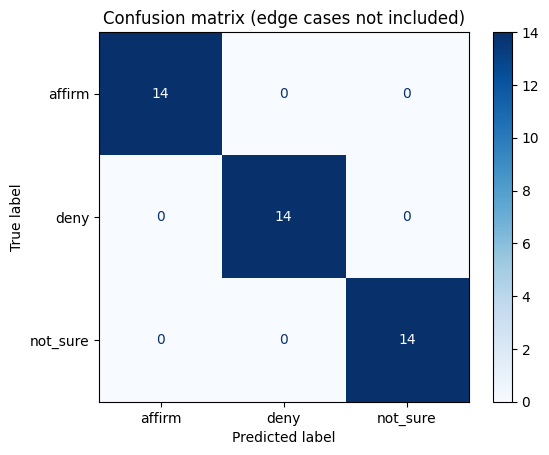

not_sure : affirm : Yes, but I’m still a bit unsure.
not_sure : affirm : Yes, I think so, but I’m not entirely sure.
deny : not_sure : No, I don’t think that’s right, or maybe it is?
not_sure : affirm : Sure, but I’m still a little hesitant.
deny : not_sure : I don’t think I can support this, but I’ll consider it.
not_sure : affirm : Probably yes, but let me double-check.
not_sure : affirm : Yes, I agree, but let’s proceed cautiously.
not_sure : deny : I can’t say yes right now.
not_sure : affirm : Yes, but I’ll need further clarification.
deny : not_sure : No, that’s not correct... or is it?
not_sure : affirm : Yes, that’s fine, but I still have reservations.
not_sure : deny : No, not really, but I’m open to being convinced.
not_sure : affirm : Sure, but I’m hesitant to commit completely.
not_sure : affirm : Yes, but I still need to verify a few things.


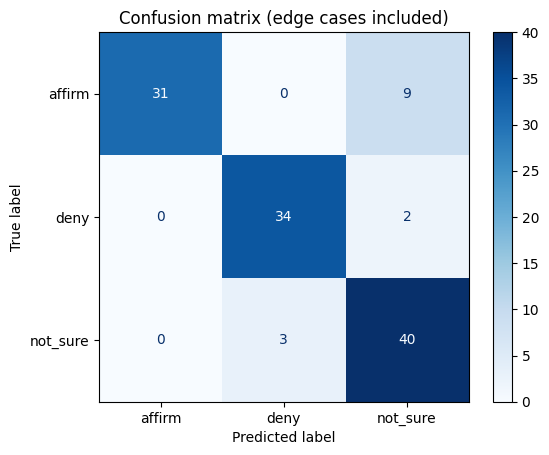

Full(edge cases included) classification report:
              precision    recall  f1-score   support

      affirm       1.00      0.78      0.87        40
        deny       0.92      0.94      0.93        36
    not_sure       0.78      0.93      0.85        43

    accuracy                           0.88       119
   macro avg       0.90      0.88      0.89       119
weighted avg       0.90      0.88      0.88       119



In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from matplotlib import pyplot as plt

true_categories = []
predicted_categories = []

test_data = test_samples
for sample in test_data:
    predicted = classify(sample["text"])
    true_categories.append(sample["category"])
    predicted_categories.append(predicted)
    if predicted != sample["category"]:
        print(f'{predicted} : {sample["category"]} : {sample["text"]}')

# display confusino matrix
cm = confusion_matrix(true_categories, predicted_categories, labels=list(category_centroids.keys()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=category_centroids.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion matrix (edge cases not included)")
plt.show()

test_data = test_data + edge_cases
for sample in test_data:
    predicted = classify(sample["text"])
    true_categories.append(sample["category"])
    predicted_categories.append(predicted)
    if predicted != sample["category"]:
        print(f'{predicted} : {sample["category"]} : {sample["text"]}')

# display confusino matrix
cm = confusion_matrix(true_categories, predicted_categories, labels=list(category_centroids.keys()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=category_centroids.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion matrix (edge cases included)")
plt.show()

# print classification report
print("Full(edge cases included) classification report:")
report = classification_report(true_categories, predicted_categories, labels=list(category_centroids.keys()))
print(report)

Improvement Prospectives:
- More varied training data. Better embedding model.